In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import scipy.special as special
import scipy.stats as stats
from sklearn.linear_model import LinearRegression,Lasso, ElasticNet
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import Ridge
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.base import BaseEstimator, RegressorMixin, clone, TransformerMixin
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [2]:
training_data = pd.read_csv("train.csv")
testing_data = pd.read_csv("test.csv")

In [3]:
# print training_data.columns
# print testing_data.columns

In [4]:
y = training_data["SalePrice"]
training_data.drop(labels="SalePrice", axis=1, inplace=True)


In [5]:
# x = training_data.drop("SalePrice", axis=1)
len(training_data.columns)
all_data = pd.concat((training_data, testing_data)).reset_index(drop=True) # no axis=1 bro
all_data.shape

(2919, 80)

In [6]:
all_data.drop(labels="Id", axis=1, inplace=True)

In [7]:
# all_data.shape

all_data_na = (all_data.isnull().sum()/len(all_data)).sort_values(ascending=False)
all_data_na.drop(labels=all_data_na[all_data_na == 0].index, axis=0, inplace=True)
# all_data_na

In [8]:
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")
all_data["Alley"] = all_data["Alley"].fillna("None")
all_data["Fence"] = all_data["Fence"].fillna("None")
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")


Text(0,0.5,'SalePrice')

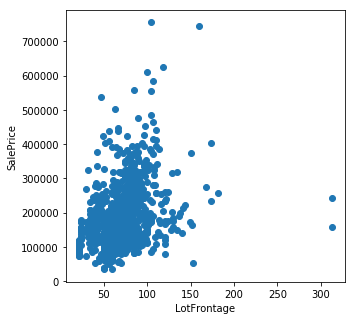

In [9]:
f, ax = plt.subplots(figsize=(5,5))
lot_saleprice = pd.concat([training_data["LotFrontage"], y], axis =1)
ax.scatter(x=training_data["LotFrontage"], y=y)
plt.xlabel("LotFrontage")
plt.ylabel("SalePrice")

In [10]:
# Group by wahi kar raha hai jo SQL me karta tha! Count karte the groupby karke to har ek group ka count uske 
# saamne aa jaata tha! Waise hi isme bhi har ek group ka median us group ke saamne aa jayega.

# In a neighbourhood, area of the front street will be almost same for all the houses of that neighboirhood.
# Median hi le lete hain phir!

all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

# For forgotten information on tranform, visit http://pbpython.com/pandas_transform.html

In [11]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')

In [12]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)

In [13]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)

In [14]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')

In [15]:
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

In [16]:
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

In [17]:
# Because approximately all the rows have a value of AllPub
all_data.drop(labels="Utilities", axis=1, inplace=True)

In [18]:
all_data_na = (all_data.isnull().sum()/len(all_data)).sort_values(ascending=False)
all_data_na.drop(labels=all_data_na[all_data_na == 0].index, axis=0, inplace=True)
all_data_na*100

Functional     0.068517
Exterior1st    0.034258
SaleType       0.034258
Exterior2nd    0.034258
Electrical     0.034258
KitchenQual    0.034258
dtype: float64

In [19]:
all_data.isnull().sum().sort_values(ascending=False).head(15)

Functional       2
Exterior1st      1
SaleType         1
Exterior2nd      1
Electrical       1
KitchenQual      1
Foundation       0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
SaleCondition    0
RoofMatl         0
BsmtCond         0
BsmtExposure     0
dtype: int64

In [20]:
for col in ["BsmtCond", "BsmtExposure", "BsmtQual", "BsmtFinType2", "BsmtFinType1"]:
    all_data[col] = all_data[col].fillna("None")

In [21]:
all_data["Functional"] = all_data["Functional"].fillna("Typ")
all_data["Exterior1st"] = all_data["Exterior1st"].fillna(all_data["Exterior1st"].mode()[0])
all_data["SaleType"] = all_data["SaleType"].fillna(all_data["SaleType"].mode()[0])
all_data["Electrical"] = all_data["Electrical"].fillna(all_data["Electrical"].mode()[0])
all_data["Exterior2nd"] = all_data["Exterior2nd"].fillna(all_data["Exterior2nd"].mode()[0])
all_data["KitchenQual"] = all_data["KitchenQual"].fillna(all_data["KitchenQual"].mode()[0])
all_data["Exterior1st"] = all_data["Exterior1st"].fillna(all_data["Exterior1st"].mode()[0])

In [22]:
all_data.isnull().sum().sort_values(ascending=False).head(15)

SaleCondition    0
BsmtQual         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtCond         0
RoofStyle        0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
dtype: int64

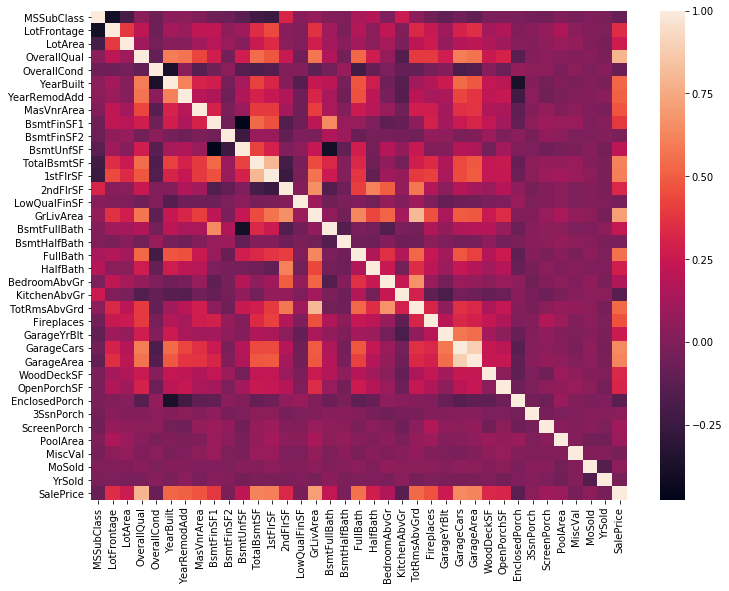

In [23]:
temp_data = pd.concat([all_data, y], axis=1)
corrmat = temp_data.corr()
f, ax = plt.subplots(figsize=(12, 9))  # subplot'S' hai bro!
sns.heatmap(corrmat)

In [24]:
all_data.drop(labels="GarageCars", axis=1, inplace=True)

In [25]:
all_data.drop(labels="TotRmsAbvGrd", axis=1, inplace=True)

In [26]:
all_data.drop(labels=["MoSold", "YrSold"], axis=1, inplace=True)

In [27]:
all_data["OverallCond"] = all_data["OverallCond"].astype(str)
all_data["OverallQual"] = all_data["OverallQual"].astype(str)
all_data["MSSubClass"] = all_data["MSSubClass"].astype(str)
all_data["PoolQC"].dtype

dtype('O')

In [28]:
# Label Encoding will basically divide values in differenct integers like 0, 1, 2 etc. Disadvanatge of this might 
# that the model might learn that 2<1<0 which migfht or might not be exactly what we aim to learn. But in case of
# ordered data like Ex, Vgood, Good etcetra, label encoding will learn the ordering accordingly!

from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'OverallQual')

# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

In [29]:
all_data["Street"].dtype

dtype('int64')

In [30]:
skewable_cols = all_data.dtypes[all_data.dtypes!=object].index
print skewable_cols

Index([u'MSSubClass', u'LotFrontage', u'LotArea', u'Street', u'Alley',
       u'LotShape', u'LandSlope', u'OverallQual', u'OverallCond', u'YearBuilt',
       u'YearRemodAdd', u'MasVnrArea', u'ExterQual', u'ExterCond', u'BsmtQual',
       u'BsmtCond', u'BsmtExposure', u'BsmtFinType1', u'BsmtFinSF1',
       u'BsmtFinType2', u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF',
       u'HeatingQC', u'CentralAir', u'1stFlrSF', u'2ndFlrSF', u'LowQualFinSF',
       u'GrLivArea', u'BsmtFullBath', u'BsmtHalfBath', u'FullBath',
       u'HalfBath', u'BedroomAbvGr', u'KitchenAbvGr', u'KitchenQual',
       u'Functional', u'Fireplaces', u'FireplaceQu', u'GarageYrBlt',
       u'GarageFinish', u'GarageArea', u'GarageQual', u'GarageCond',
       u'PavedDrive', u'WoodDeckSF', u'OpenPorchSF', u'EnclosedPorch',
       u'3SsnPorch', u'ScreenPorch', u'PoolArea', u'PoolQC', u'Fence',
       u'MiscVal'],
      dtype='object')


In [31]:
# for col in skewable_cols:
#     print col
#     print stats.skew(all_data[col])

skewness = all_data[skewable_cols].apply(lambda x: stats.skew(x.dropna())).sort_values(ascending=False)


In [32]:
for col in skewness.index:
    all_data[col] = special.boxcox1p(all_data[col], 0.15)

In [33]:
# all_data.isna().sum().sort_values(ascending=False)

In [34]:
all_data = pd.get_dummies(all_data)


In [35]:
y = np.log(y)

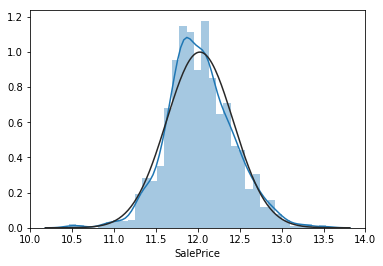

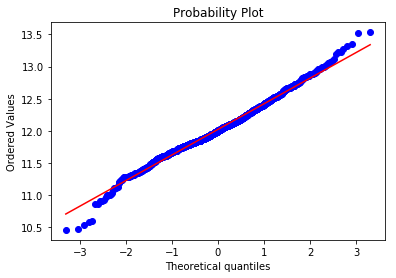

In [36]:
sns.distplot(y , fit=stats.norm);

fig = plt.figure()
res = stats.probplot(y, plot=plt)
plt.show()

In [37]:
ntrain = training_data.shape[0]
ntest = testing_data.shape[0]

In [38]:
train = all_data[:ntrain]
test = all_data[ntrain:]
y_train = y[:ntrain]

In [39]:
# all_data.isna().sum()

In [40]:
lr = LinearRegression()

In [41]:
# lr.fit(train, y)

In [42]:
# lr.score(train, y)

In [43]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
#     print kf
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [44]:
score = rmsle_cv(lr)

In [45]:
print score

[1.99435293e+09 2.81487119e+08 3.92861274e+07 4.71522818e+08
 2.10064080e+08]


In [46]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha=0.001, random_state=1))

In [47]:
score = rmsle_cv(lasso)
print "Mean is: {} and standard_dev: {}".format(score.mean(), score.std()) 


Mean is: 0.128428370768 and standard_dev: 0.015082855518


In [48]:
e_net = make_pipeline(RobustScaler(), ElasticNet(alpha=0.001, random_state = 3, l1_ratio=.45))

In [49]:
score = rmsle_cv(e_net)
print "Mean is: {} and standard_dev: {}".format(score.mean(), score.std()) 


Mean is: 0.127058847162 and standard_dev: 0.015958932711


In [50]:
krr = KernelRidge(alpha=0.9, kernel='polynomial', degree=2, coef0=2)

In [51]:
score = rmsle_cv(krr)
print "Mean is: {} and standard_dev: {}".format(score.mean(), score.std()) 


Mean is: 0.130691610941 and standard_dev: 0.0128324958379


In [52]:
g_boost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [53]:
score = rmsle_cv(g_boost)
print "Mean is: {} and standard_dev: {}".format(score.mean(), score.std()) 


Mean is: 0.126731256539 and standard_dev: 0.0114382608988


In [54]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [55]:
score = rmsle_cv(model_xgb)
print "Mean is: {} and standard_dev: {}".format(score.mean(), score.std()) 


Mean is: 0.122657745172 and standard_dev: 0.0101058240992


In [56]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [57]:
score = rmsle_cv(model_lgb)
print "Mean is: {} and standard_dev: {}".format(score.mean(), score.std()) 


Mean is: 0.124441086873 and standard_dev: 0.0113094006037


In [58]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
#         print "Prdeictions Initially:{}".format(predictions.shape) 
        return np.mean(predictions, axis=1)   

In [59]:
averaged_models = AveragingModels(models = (e_net, g_boost, krr, lasso))

score = rmsle_cv(averaged_models)
print("Mean is: {} and standard deviation is:{}".format(score.mean(), score.std()))



Mean is: 0.122720021849 and standard deviation is:0.013779981382


In [60]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [61]:
avg_models = averaged_models.fit(train.values, y)

In [62]:
avg_models_pred = averaged_models.predict(train)
# print avg_models_pred.shape, y.shape
rmsle(y, avg_models_pred)

0.09155435311415573

In [63]:
model_xgb.fit(train, y)
model_xgb_pred = model_xgb.predict(train)
rmsle(y, model_xgb_pred)

0.08033209569482504

In [64]:
model_lgb.fit(train,y)
model_lgb_pred = model_lgb.predict(train)
rmsle(y, model_lgb_pred)

0.07761419182181863